# Importing all the crucial libraries

In [ ]:
# First of all we will import all the crucial libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Load the data

In [ ]:
# Now we will load out data.

df=pd.read_excel("C:/Users/Abhinav Mishra/Desktop/Bike Sales Dashboard.xlsx", sheet_name="bike_buyers")
df

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No


# Identifying and handling the missing values

In [ ]:
# Now we will check whether any null value is present in our data and if present then we'll treat it as per required.
df.isnull().sum()

ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

# Exploratory Data Analysis (EDA)

In [ ]:
df

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No


<Axes: xlabel='Income', ylabel='Count'>

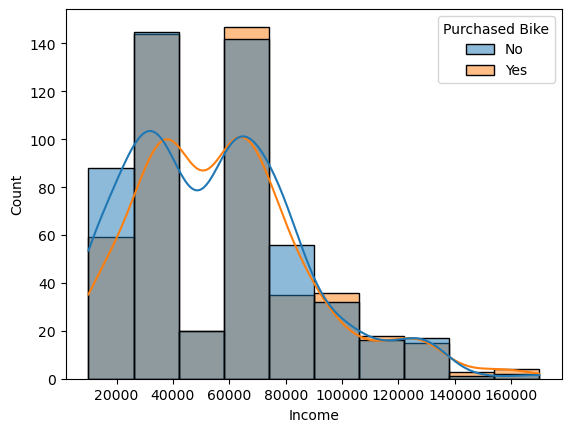

In [ ]:
# This shows whether people with this salary have bought a bike or not.

sns.histplot(data=df, x='Income', hue='Purchased Bike',bins=10, kde=True, color="m")

<Axes: xlabel='Martial Status', ylabel='count'>

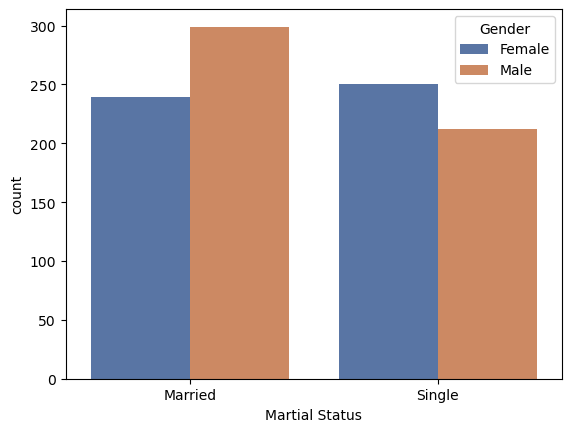

In [ ]:
# This shows how many married and single male and female whether purchased bike or not.
sns.countplot(data=df,x='Martial Status', hue='Gender', palette='deep')

<Axes: xlabel='Purchased Bike', ylabel='count'>

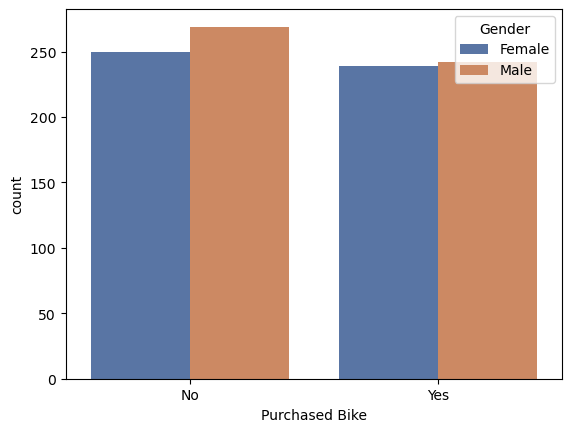

In [ ]:
# This Shows that how many male and female whether purchased bike or not.

sns.countplot(data=df,x='Purchased Bike', hue='Gender', palette='deep')

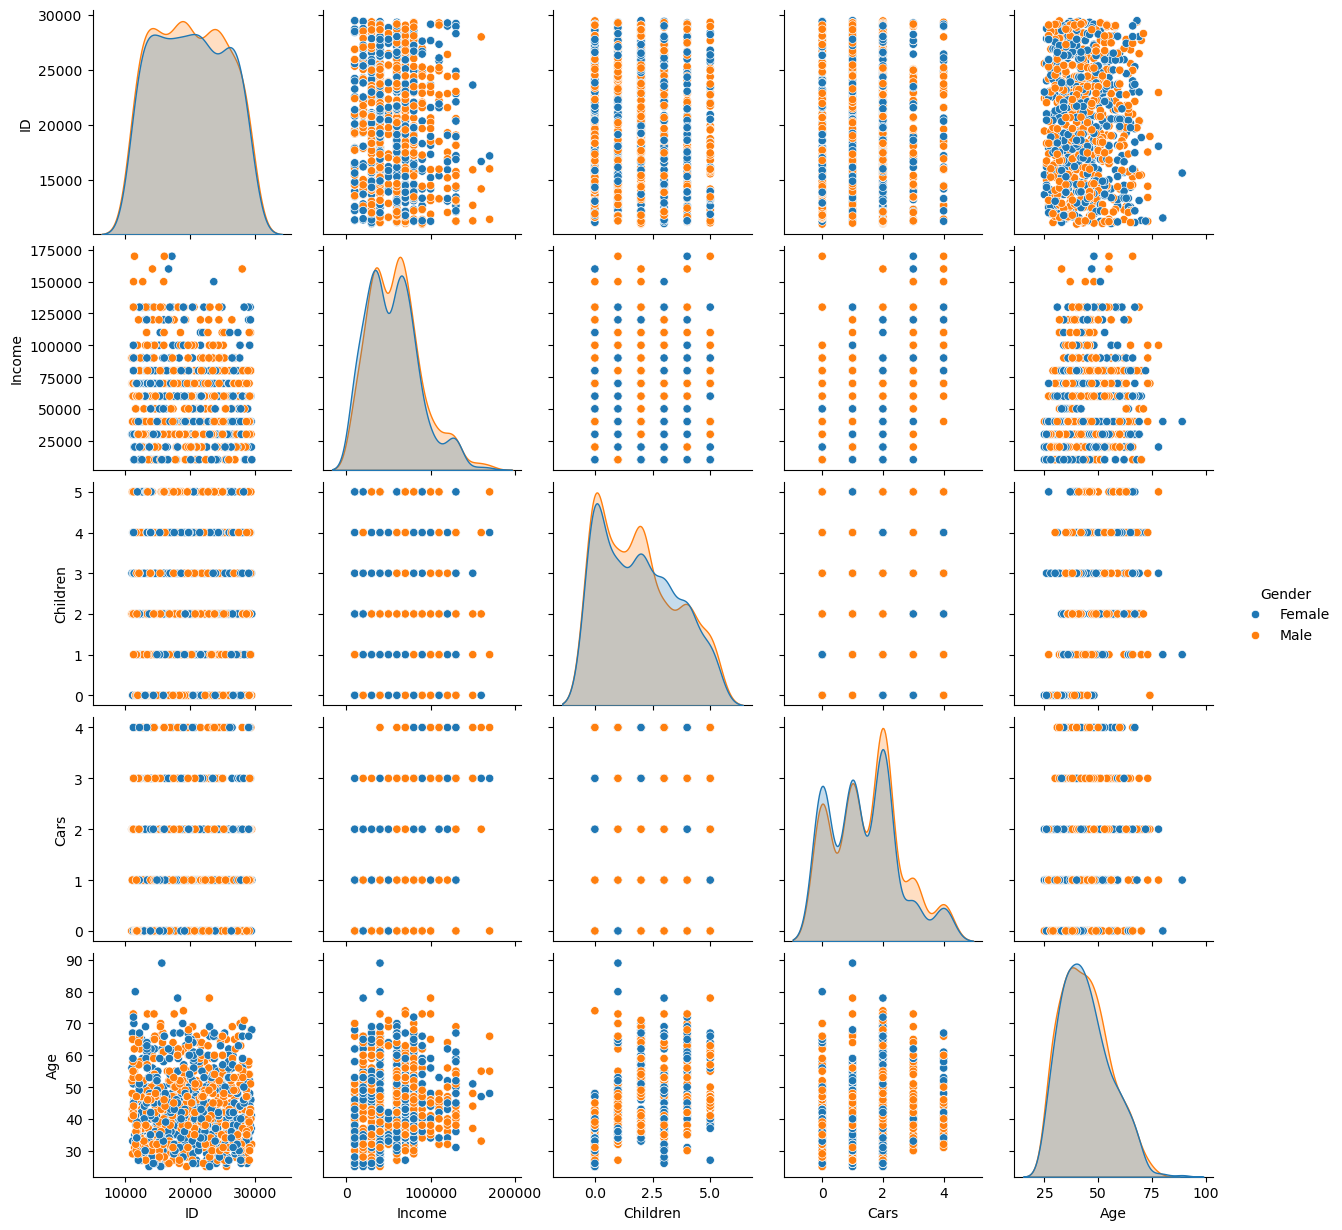

In [ ]:
# This matrix is so important because you can see all the relation.
# My main aim is that making prediction to buy bike or not so there is no corellation between all columns.
sns.pairplot(data=df, hue='Gender')


# Drop

In [ ]:
# Now we will drop the infomation which is not usefull or which do not have any major impact on our data.

In [ ]:
df=df.drop(["ID","Martial Status","Education","Age Brackets"], axis=1)

In [ ]:
df

,Gender,Income,Children,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Female,40000,1,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,Male,30000,3,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,Male,80000,5,Professional,No,2,2-5 Miles,Europe,60,No
3,Male,70000,0,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,Male,30000,0,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...
995,Male,60000,2,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,Male,70000,4,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,Male,60000,2,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,Male,100000,3,Management,No,3,1-2 Miles,North America,38,No


# Finding unique value

In [ ]:
# Now we will create a variable for our categorical columns and then we will find the unique value.

cat_col=df[["Gender","Occupation","Home Owner","Region","Purchased Bike","Commute Distance"]]
cat_col

,Gender,Occupation,Home Owner,Region,Purchased Bike,Commute Distance
0,Female,Skilled Manual,Yes,Europe,No,0-1 Miles
1,Male,Clerical,Yes,Europe,No,0-1 Miles
2,Male,Professional,No,Europe,No,2-5 Miles
3,Male,Professional,Yes,Pacific,Yes,5-10 Miles
4,Male,Clerical,No,Europe,Yes,0-1 Miles
...,...,...,...,...,...,...
995,Male,Professional,Yes,North America,Yes,2-5 Miles
996,Male,Professional,Yes,North America,Yes,2-5 Miles
997,Male,Skilled Manual,Yes,North America,Yes,0-1 Miles
998,Male,Management,No,North America,No,1-2 Miles


In [ ]:
for i in cat_col:
    print(i)
    print(cat_col[i].unique())

Gender
['Female' 'Male']
Occupation
['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner
['Yes' 'No']
Region
['Europe' 'Pacific' 'North America']
Purchased Bike
['No' 'Yes']
Commute Distance
['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' 'More than 10 Miles']


# Scatter Plot

<Axes: title={'center': 'Scatter plot between Occupation and Age'}, xlabel='Occupation', ylabel='Age'>

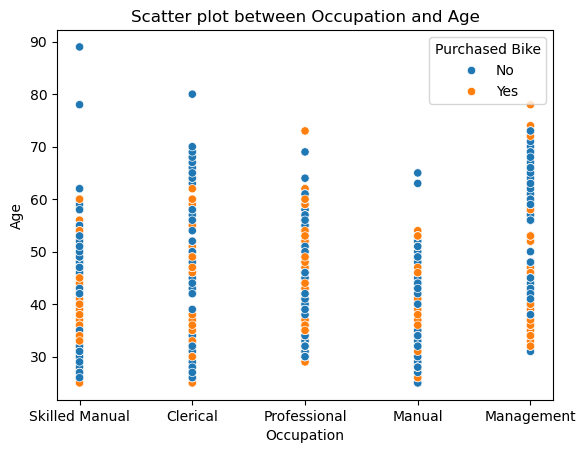

In [ ]:
# Now we will create a scatter plot for our better understanding.

plt.title("Scatter plot between Occupation and Age")
sns.scatterplot(x="Occupation", y="Age", data=df, hue="Purchased Bike")

In [ ]:
# In commute distance col the value is present in string.
# So we will convert that string value to float for our smooth data processing.

In [ ]:
df['Commute Distance'] = df['Commute Distance'].str.extract('(\d+)').astype(float)
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Abhinav Mishra\AppData\Local\Temp\ipykernel_6160\2562507084.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Commute Distance'] = df['Commute Distance'].str.extract('(\d+)').astype(float)


,Gender,Income,Children,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Female,40000,1,Skilled Manual,Yes,0,0.0,Europe,42,No
1,Male,30000,3,Clerical,Yes,1,0.0,Europe,43,No
2,Male,80000,5,Professional,No,2,2.0,Europe,60,No
3,Male,70000,0,Professional,Yes,1,5.0,Pacific,41,Yes
4,Male,30000,0,Clerical,No,0,0.0,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...
995,Male,60000,2,Professional,Yes,2,2.0,North America,54,Yes
996,Male,70000,4,Professional,Yes,0,2.0,North America,35,Yes
997,Male,60000,2,Skilled Manual,Yes,0,0.0,North America,38,Yes
998,Male,100000,3,Management,No,3,1.0,North America,38,No


# Box PLot

In [ ]:
# Now we will create a variable for our numerical values column and then create boxplot for them

In [ ]:
num_df=df[["Income","Children","Cars","Age","Commute Distance"]]
num_df

,Income,Children,Cars,Age,Commute Distance
0,40000,1,0,42,0.0
1,30000,3,1,43,0.0
2,80000,5,2,60,2.0
3,70000,0,1,41,5.0
4,30000,0,0,36,0.0
...,...,...,...,...,...
995,60000,2,2,54,2.0
996,70000,4,0,35,2.0
997,60000,2,0,38,0.0
998,100000,3,3,38,1.0


<Axes: ylabel='Income'>

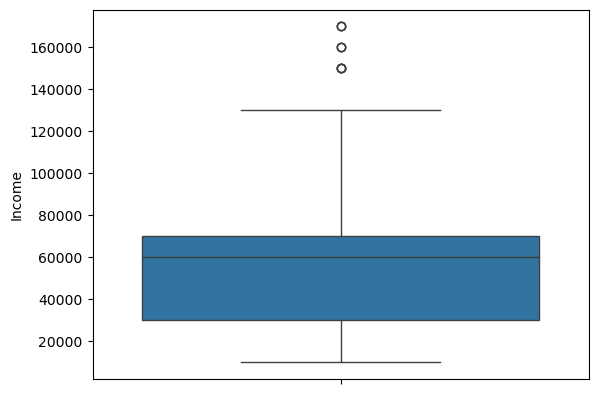

In [ ]:
sns.boxplot(y="Income", data=df)

<Axes: ylabel='Children'>

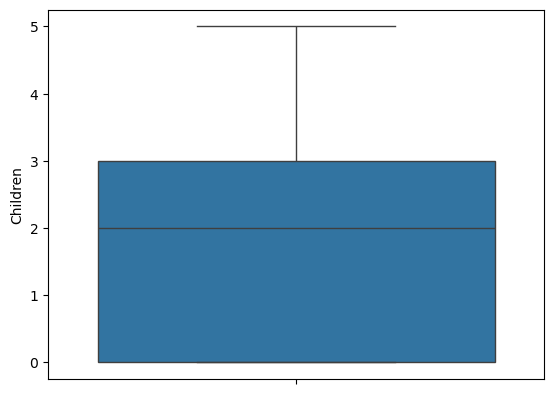

In [ ]:
sns.boxplot(y="Children", data=df)

<Axes: ylabel='Cars'>

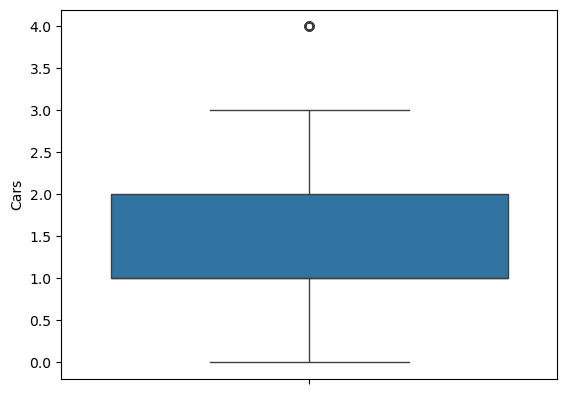

In [ ]:
sns.boxplot(y="Cars", data=df)

<Axes: ylabel='Age'>

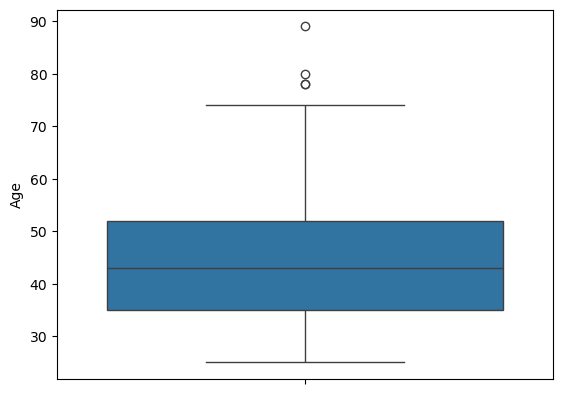

In [ ]:
sns.boxplot(y="Age", data=df)

<Axes: ylabel='Commute Distance'>

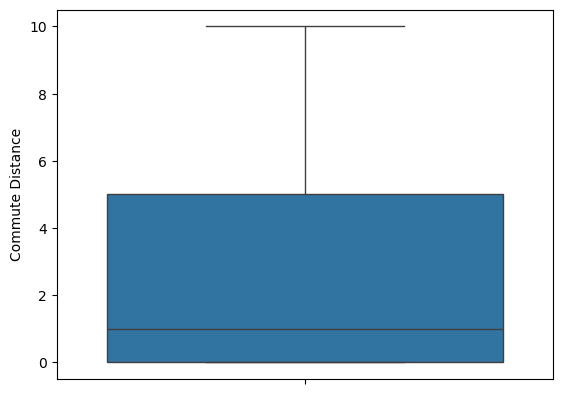

In [ ]:
sns.boxplot(y="Commute Distance", data=df)

In [ ]:
# Finding correlation between them.

num_df.corr()

,Income,Children,Cars,Age,Commute Distance
Income,1.000000,0.258603,0.428701,0.170077,0.239645
Children,0.258603,1.000000,0.263360,0.529743,0.176154
Cars,0.428701,0.263360,1.000000,0.188040,0.405358
Age,0.170077,0.529743,0.188040,1.000000,0.256773
Commute Distance,0.239645,0.176154,0.405358,0.256773,1.000000


<Axes: >

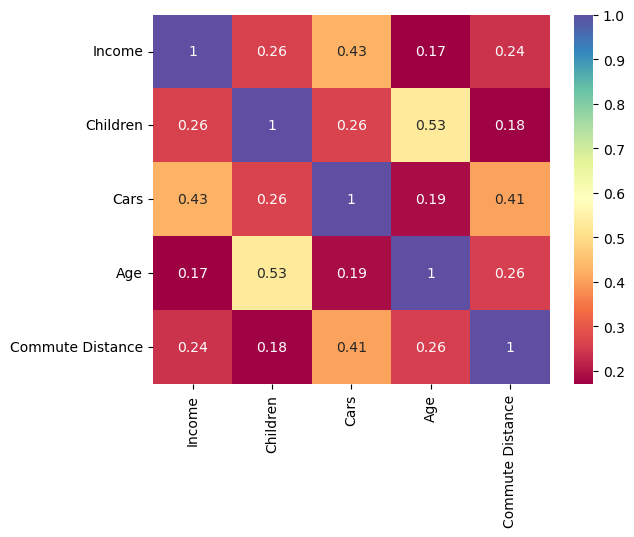

In [ ]:
# Creating a heatmap for the correlation

sns.heatmap(num_df.corr(), annot=True, cmap="Spectral")

# Treating outliers

In [ ]:
# As we have seen there are outliers values present. So now we will treat them.
col_df=df[["Income","Children","Cars","Commute Distance","Age"]]
col_df

,Income,Children,Cars,Commute Distance,Age
0,40000,1,0,0.0,42
1,30000,3,1,0.0,43
2,80000,5,2,2.0,60
3,70000,0,1,5.0,41
4,30000,0,0,0.0,36
...,...,...,...,...,...
995,60000,2,2,2.0,54
996,70000,4,0,2.0,35
997,60000,2,0,0.0,38
998,100000,3,3,1.0,38


40000.0
130000.0
-30000.0
3.0
7.5
-4.5
2.0
5.0
-3.0
5.0
12.5
-7.5
17.0
77.5
9.5


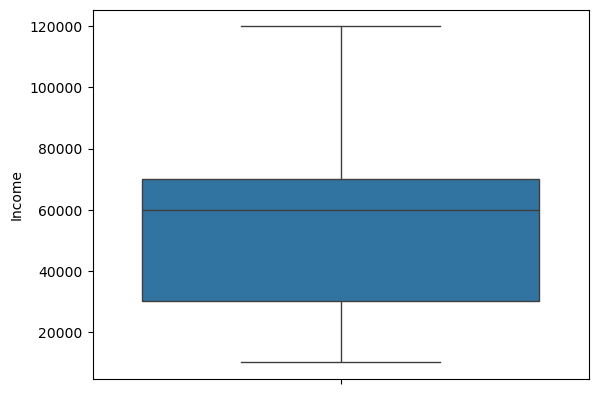

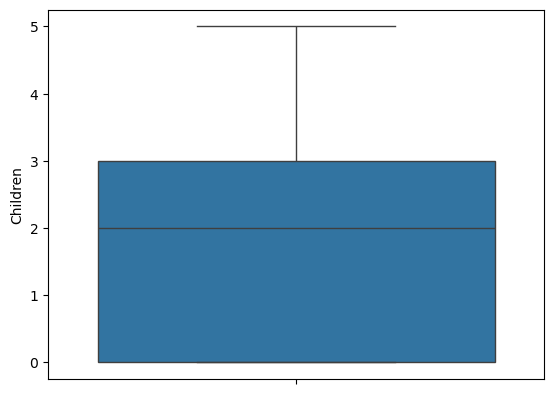

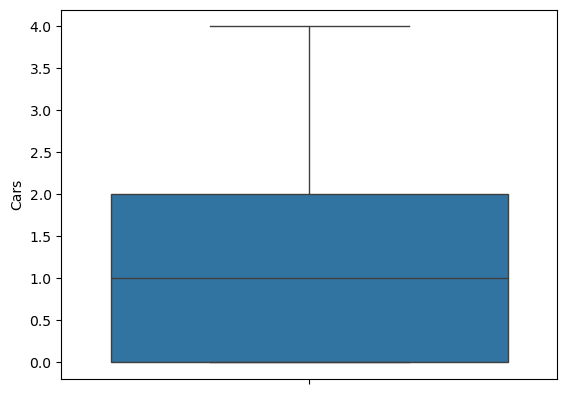

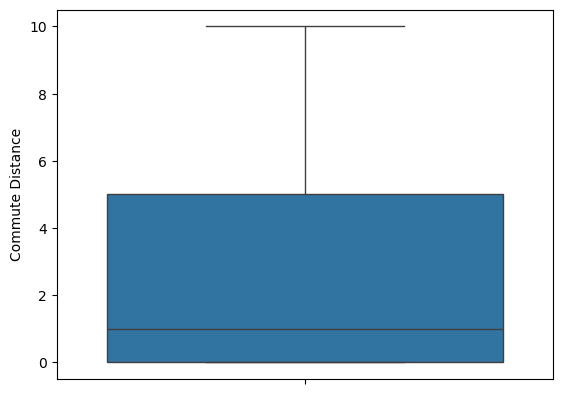

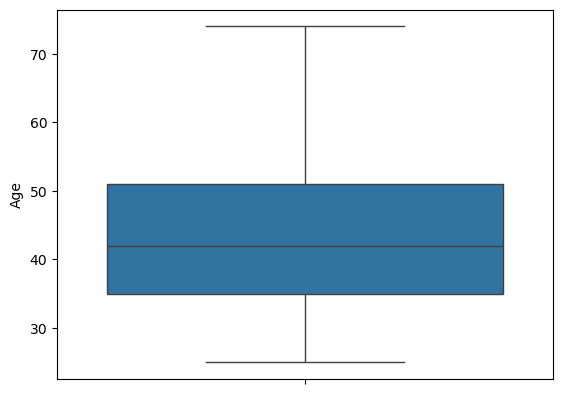

In [ ]:
for c in col_df:
    percentile25 = df[c].quantile(0.25)
    percentile75 = df[c].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + (1.5*iqr)
    lower_limit = percentile25 - (1.5*iqr)
    df = df[df[c]<upper_limit]
    df = df[df[c]>lower_limit]
    print(iqr)
    print(upper_limit)
    print(lower_limit)
    plt.figure()
    sns.boxplot(y=c,data=df)

In [ ]:
df.shape

(954, 10)

In [ ]:
# As we can see that there are no outliers values present now.

# Encoding

In [ ]:
# Now we will do the onehot encoding for the required columns.

In [ ]:
df

,Gender,Income,Children,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Female,40000,1,Skilled Manual,Yes,0,0.0,Europe,42,No
1,Male,30000,3,Clerical,Yes,1,0.0,Europe,43,No
2,Male,80000,5,Professional,No,2,2.0,Europe,60,No
3,Male,70000,0,Professional,Yes,1,5.0,Pacific,41,Yes
4,Male,30000,0,Clerical,No,0,0.0,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...
995,Male,60000,2,Professional,Yes,2,2.0,North America,54,Yes
996,Male,70000,4,Professional,Yes,0,2.0,North America,35,Yes
997,Male,60000,2,Skilled Manual,Yes,0,0.0,North America,38,Yes
998,Male,100000,3,Management,No,3,1.0,North America,38,No


In [ ]:
# Slicing the datasets into x and y
x=df.iloc[:,:9].values
y=df.iloc[:,-1].values

In [ ]:
x,y

(array([['Female', 40000, 1, ..., 0.0, 'Europe', 42],
        ['Male', 30000, 3, ..., 0.0, 'Europe', 43],
        ['Male', 80000, 5, ..., 2.0, 'Europe', 60],
        ...,
        ['Male', 60000, 2, ..., 0.0, 'North America', 38],
        ['Male', 100000, 3, ..., 1.0, 'North America', 38],
        ['Male', 60000, 3, ..., 10.0, 'North America', 53]], dtype=object),
 array(['No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
        'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
        'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
        'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
        'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
        'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
        'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
        'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
        'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',

In [ ]:
# Performing onehot encoding for the required columns.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,3,4,7])], remainder = 'passthrough')
x=np.array(ct.fit_transform(x))
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,40000,1,0,0.0,42
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,30000,3,1,0.0,43
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,80000,5,2,2.0,60
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,70000,0,1,5.0,41
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,30000,0,0,0.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,60000,2,2,2.0,54
950,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,70000,4,0,2.0,35
951,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,60000,2,0,0.0,38
952,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,100000,3,3,1.0,38


# Data Splitting

In [ ]:
# Importing train_test_split module from sklearn.model.selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)

# Feature Scaling

In [ ]:
# Importing standardScaler module from sklearn.preprocessing.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Applying KNeighbourCLassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
# Importing metrics module from sklearn.
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[63, 37],
       [22, 69]], dtype=int64)

In [ ]:
# Importing accuracy_score module from sklearn.metrics.
from sklearn.metrics import accuracy_score

In [ ]:
score=accuracy_score(y_test,y_pred)

In [ ]:
# Printing score
score

0.6910994764397905

In [ ]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# Training a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train_res, y_train_res)

# Making predictions
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Printing the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")


Accuracy: 0.7225130890052356
Precision: 0.7021276595744681
Recall: 0.7252747252747253
ROC-AUC: 0.7723076923076924


In [ ]:
# Printing the accuracy score of our model
score=float(accuracy_score(y_test,y_pred)*100)
print("The Accuracy of model is: ", score)

The Accuracy of model is:  72.25130890052355


In [ ]:
# This is our trained value.
y_train

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',

In [ ]:
#This is our predicted value.
y_pred

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No

# Testing our data model

In [ ]:
import joblib

In [ ]:
y_prediction=[]
for i in range(x_test.shape[0]):
    check_data=x_test[i,0:]
    joblib.dump(knn, "knn_model.pkl")
    new_data=check_data.reshape(1,-1)
    model=joblib.load("knn_model.pkl")
    prediction=model.predict(new_data)
    prediction

    if prediction=='Yes':
        y_prediction.append("Yes")
    else:
        y_prediction.append("No")

In [ ]:
y_actual=[]
for i in range(y_test.shape[0]):
    y_actual.append(y_test[i])

In [ ]:
A=pd.Series(y_actual)
B=pd.Series(y_prediction)

In [ ]:
# Printing the actual values and the values predicted by our data model.
pd.concat([A,B],axis=1).rename(columns={0:"Actual_Values", 1:"Predicted Values"})

,Actual_Values,Predicted Values
0,Yes,Yes
1,Yes,Yes
2,No,Yes
3,Yes,Yes
4,No,No
...,...,...
186,No,Yes
187,No,No
188,No,No
189,Yes,Yes
